In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
per_hour = pd.read_csv('per_hour_stats.csv', index_col="pickup_hour")
per_hour.drop(columns=['Unnamed: 0'], inplace=True)
per_hour['average_traffic'] = per_hour['average_traffic'] * 60
per_hour

,average_tip,average_traffic
pickup_hour,,
0,1.023720,15.691535
1,0.988683,16.325604
2,0.966422,16.854152
3,0.955715,17.501417
4,1.019976,19.637037
5,1.301962,22.066018
6,1.047167,18.460822
7,0.966198,14.670694
8,0.996611,12.086986


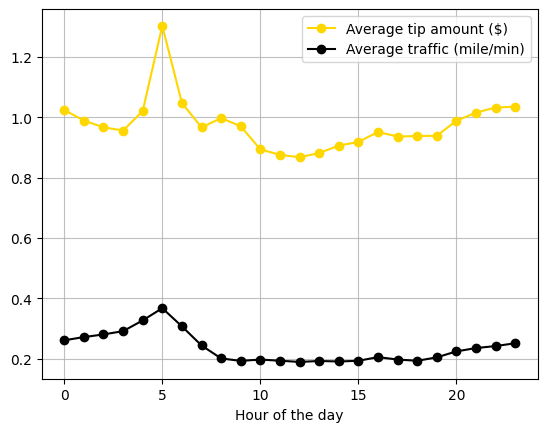

In [3]:
plt.figure()
plt.plot(per_hour.index, per_hour['average_tip'], marker='o', linestyle='-', color='gold')
plt.plot(per_hour.index, per_hour['average_traffic'], marker='o', linestyle='-', color='black')
plt.grid(True, alpha=0.8)
plt.legend(['Average tip amount ($)', 'Average traffic (mile/hour)'])
plt.xlabel("Hour of the day")
plt.savefig("per_hour.png")
plt.show()

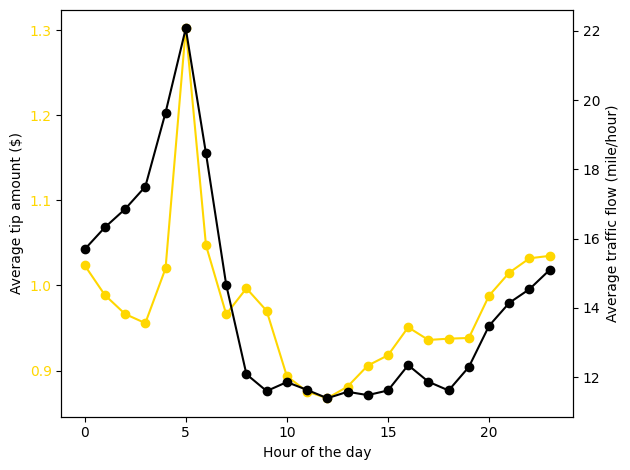

In [16]:
fig, ax1 = plt.subplots()
ax1.plot(per_hour.index, per_hour['average_tip'], marker='o', linestyle='-', color='gold')
ax1.set_xlabel("Hour of the day")
ax1.set_ylabel("Average tip amount ($)")
ax1.tick_params(axis='y', labelcolor='gold')

ax2 = ax1.twinx()
ax2.plot(per_hour.index, per_hour['average_traffic'], marker='o', linestyle='-', color='black')
ax2.set_ylabel("Average traffic flow (mile/hour)")
ax2.tick_params(axis='y', labelcolor='black')

fig.tight_layout()
plt.savefig("per_hour_dual.png")
plt.show()

In [4]:
traffic_df = pd.read_csv('traffic_stats.csv')
traffic_df.traffic = traffic_df.traffic * 60
traffic_df.set_index('traffic', inplace=True)
traffic_df.drop(columns=['Unnamed: 0'], inplace=True)
traffic_df

,avg_tip_amount
traffic,
11.640000,0.651329
20.079681,0.912546
16.705263,1.545836
19.400000,0.681276
12.763636,0.894927
...,...
25.098462,4.000000
43.962162,0.000000
57.348407,10.500000


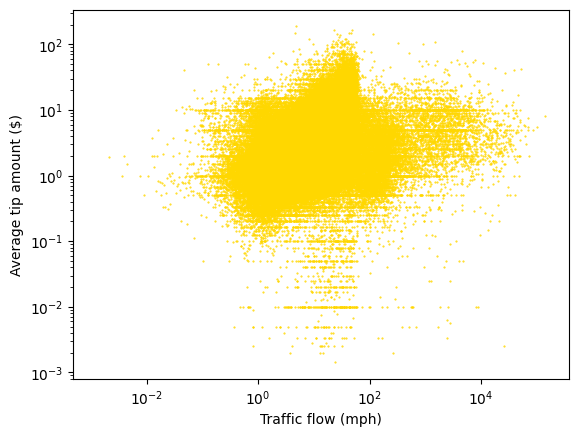

In [17]:
plt.figure()
plt.scatter(traffic_df.index, traffic_df['avg_tip_amount'], s=0.25, color='gold')
plt.xlabel("Traffic flow (mph)")
plt.ylabel("Average tip amount ($)")
plt.savefig("traffic_lin.png")
plt.xscale('log')
plt.yscale('log')
plt.savefig("traffic_log.png")
plt.show()

In [9]:
hourly_traffic = pd.read_csv('hourly_rides.csv', index_col='hours')
hourly_traffic.drop(columns=['Unnamed: 0'], inplace=True)
hourly_traffic = hourly_traffic[hourly_traffic.index >= 0]
hourly_traffic = hourly_traffic.sort_index(ascending=True)
hourly_traffic

,active rides
hours,
0,13024223
1,10099729
2,7911390
3,6250819
4,5042288
5,6199812
6,10307544
7,14322180
8,16255109


In [10]:
average_traffic = hourly_traffic['active rides'].mean()
average_traffic

14554331.291666666

In [11]:
hourly_traffic['active rides'] = hourly_traffic['active rides'] / average_traffic
hourly_traffic

,active rides
hours,
0,0.894869
1,0.693933
2,0.543576
3,0.429482
4,0.346446
5,0.425977
6,0.708211
7,0.984049
8,1.116857


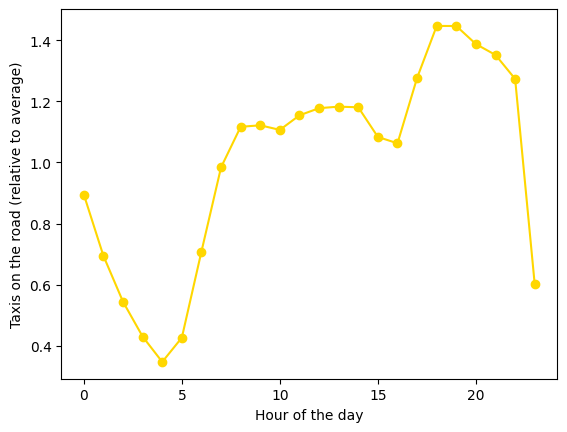

In [13]:
plt.figure()
plt.plot(hourly_traffic.index, hourly_traffic['active rides'], marker='o', linestyle='-', color='gold')
plt.xlabel("Hour of the day")
plt.ylabel("Taxis on the road (relative to average)")
plt.savefig("hourly_traffic.png")
plt.show()